In [1]:
import pandas as pd
import html5lib
import lxml
from bs4 import BeautifulSoup

url = "https://worldtable.info/gosudarstvo/tablica-rozhdaemosti-po-godam-rossija.html"
tables = pd.read_html(url)

tb1 = tables[0] # Get the first table.
tb1.columns = tb1.iloc[0] # Assign the first row as header.
tb1 = tb1.iloc[1:] # Drop the first row.
tb1.reset_index(drop=True, inplace=True) # Reset the index.

print(tb1) # Print first 5 rows.
tb1.to_csv("table1.csv") # Export to CSV file.

0    Год Количество родившихся чел.
0   1959                  2 796 228
1   1960                  2 782 353
2   1961                  2 662 135
3   1962                  2 482 539
4   1963                  2 331 505
..   ...                        ...
56  2015                  1 944 136
57  2016                  1 893 256
58  2017                  1 689 884
59  2018                  1 599 316
60  2019                  1 484 517

[61 rows x 2 columns]


In [2]:
tb1.dtypes

0
Год                           object
Количество родившихся чел.    object
dtype: object

In [3]:
tb1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Год                         61 non-null     object
 1   Количество родившихся чел.  61 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [4]:
tb1.columns

Index(['Год', 'Количество родившихся чел.'], dtype='object', name=0)

Преобразуем object в int

In [45]:
# удалить пробелы
tb1 = tb1.replace(r'\s+','',regex=True)

# преобразовываем строки в числа 
tb1[tb1.columns] = tb1[tb1.columns].apply(pd.to_numeric, errors='coerce')

In [6]:
# проверка
tb1.dtypes 

0
Год                           int64
Количество родившихся чел.    int64
dtype: object

In [7]:
tb1

,Год,Количество родившихся чел.
0,1959,2796228
1,1960,2782353
2,1961,2662135
3,1962,2482539
4,1963,2331505
...,...,...
56,2015,1944136
57,2016,1893256
58,2017,1689884
59,2018,1599316


In [40]:
# преобразуем миллионы для корректного отображения графика
tb1['Количество родившихся чел.'] = tb1.apply(lambda row: row['Количество родившихся чел.'] / 1000000, axis=1)

In [41]:
tb1['Количество родившихся чел.']

0     0.000003
1     0.000003
2     0.000003
3     0.000002
4     0.000002
        ...   
56    0.000002
57    0.000002
58    0.000002
59    0.000002
60    0.000001
Name: Количество родившихся чел., Length: 61, dtype: float64

In [42]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [43]:
import seaborn as sns
from pylab import rcParams

sns.set_style("ticks")
rcParams['figure.figsize'] = 12, 6


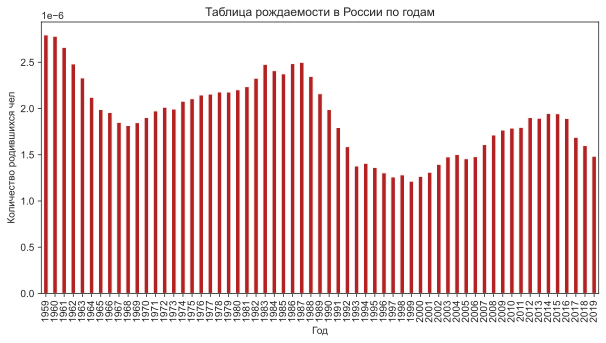

In [44]:
(tb1.plot(kind='bar',x='Год', y='Количество родившихся чел.',figsize=(10, 5), legend=False, color='firebrick')
                         .set(xlabel='Год', ylabel='Количество родившихся чел', title='Таблица рождаемости в России по годам')
)

plt.show()